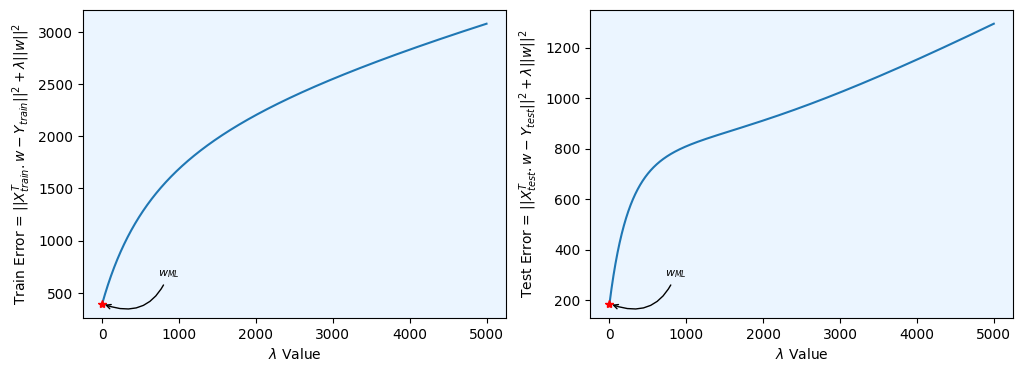

In [17]:
import numpy as np
from matplotlib import pyplot as plt

train_data = np.genfromtxt('A2Q2Data_train.csv', delimiter=',')
train_X = train_data[:, :100].T
train_Y = train_data[:, -1]
test_data = np.genfromtxt('A2Q2Data_test.csv', delimiter=',')
test_X = test_data[:, :100].T
test_Y = test_data[:, -1]

def best_w(X, Y, lamb):
    return np.matmul(np.matmul(np.linalg.inv(np.matmul(X, X.T) + lamb*np.eye(100)), X), Y)

def calculate_error(w, X, Y, lamb):
    return np.linalg.norm(np.matmul(X.T, w) - Y)**2 + lamb*(np.linalg.norm(w)**2)

upper_limit = 5000
lambdas = np.linspace(0, upper_limit, upper_limit + 1)
train_error = np.zeros(upper_limit + 1)
test_error = np.zeros(upper_limit + 1)
for i, lamb in enumerate(lambdas):
    w = best_w(train_X, train_Y, lamb)
    train_error[i] = calculate_error(w, train_X, train_Y, lamb)
    test_error[i] = calculate_error(w, test_X, test_Y, lamb)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
y = np.array([train_error, test_error])
y_labels = [r'Train Error = $||X_{train}^T.w - Y_{train}||^2 + \lambda||w||^2$', r'Test Error = $||X_{test}^T.w - Y_{test}||^2 + \lambda||w||^2$']
for i, ax in enumerate(axes):
    ax.plot(lambdas, y[i])
    ax.plot(0, y[i, 0], 'r*')
    ax.annotate(r"$w_{ML}$", xy=(0, y[i, 0]), xycoords='data', xytext=(+40, +20), textcoords='offset points', 
                fontsize=8, family='serif', arrowprops=dict(arrowstyle='->', connectionstyle="arc3, rad=-0.5"))
    ax.set_facecolor('#ebf5ff')
    ax.set_xlabel(r'$\lambda$ Value')
    ax.set_ylabel(y_labels[i])
plt.savefig('images/Q2/P1')
plt.show()

$X \in \mathbb{R}^{d\times n}$ is the array of datapoints

$Y \in \mathbb{R}^{n}$ is the array of labels

$w = (XX^T)^{-1}XY$ is the best fit line of the data.

$error = \Sigma(w^Tx_i - y_i)^2 = ||{X^Tw - Y}||^2$